In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000
L = 600
h = L / N
T = 150
lam = 1
rho = 1000
tau = h / lam / 1000
M = round(T / tau)
U = np.zeros(N, dtype=[('v', np.float64), ('p', np.float64)])

In [3]:
def convert(mat, U, f, e):
    W = np.zeros(N, dtype=[(e[0], np.float64), (e[1], np.float64)])
    for i in range(N):
        W[i][e[0]] = U[i][f[0]] * mat[0][0] + U[i][f[1]] * mat[0][1]
        W[i][e[1]] = U[i][f[0]] * mat[1][0] + U[i][f[1]] * mat[1][1]
    return W

In [4]:
def p_init(p):
    for i in range(N):
        if (i * h > 5 * L / 12) and (i * h < 7 * L / 12):
            p[i] = 10
        else:
            p[i] = 0

In [5]:
def v_init(v):
    for i in range(N):
        if (i * h > 5 * L / 12) and (i * h < 7 * L / 12):
            v[i] = 10
        else:
            v[i] = 0

In [6]:
p_init(U['p'])
v_init(U['v'])

In [7]:
mat = np.array([[1, -1], [rho * lam, rho * lam]])
W = convert(mat, U, f=('v', 'p'), e=('1', '2'))

In [8]:
def D1_solver(h, N, M, lam, tau, Q_0):
    Q = Q_0.copy()
    Q_new = np.zeros_like(Q)
    for j in range(M):
        for i in range (N):
            if lam > 0:
                x_star = -lam * tau
                b = Q[i]
                a = (Q[i - 1] - b) / (-h)
                Q_new[i] = a * x_star + b
            else:
                x_star = -lam * tau
                b = Q[i - 1]
                a = (Q[i] - b) / h
                Q_new[i - 1] = a * x_star + b
        Q = Q_new
    return Q_new

In [9]:
W_new = np.zeros(N, dtype=[('1', np.float64), ('2', np.float64)])
W_new['1'] = D1_solver(h, N, M, -lam, tau, W['1'])
W_new['2'] = D1_solver(h, N, M, lam, tau, W['2'])
x = np.linspace(0, L, N)
mat_obr = np.array([[1 / 2, 1 / (2 * rho * lam)], [-1 / 2, 1 / (2 * rho * lam)]])
U_new = np.zeros(N, dtype=[('v', np.float64), ('p', np.float64)])
U_new = convert(mat_obr, W_new, f=('1', '2'), e=('v', 'p'))


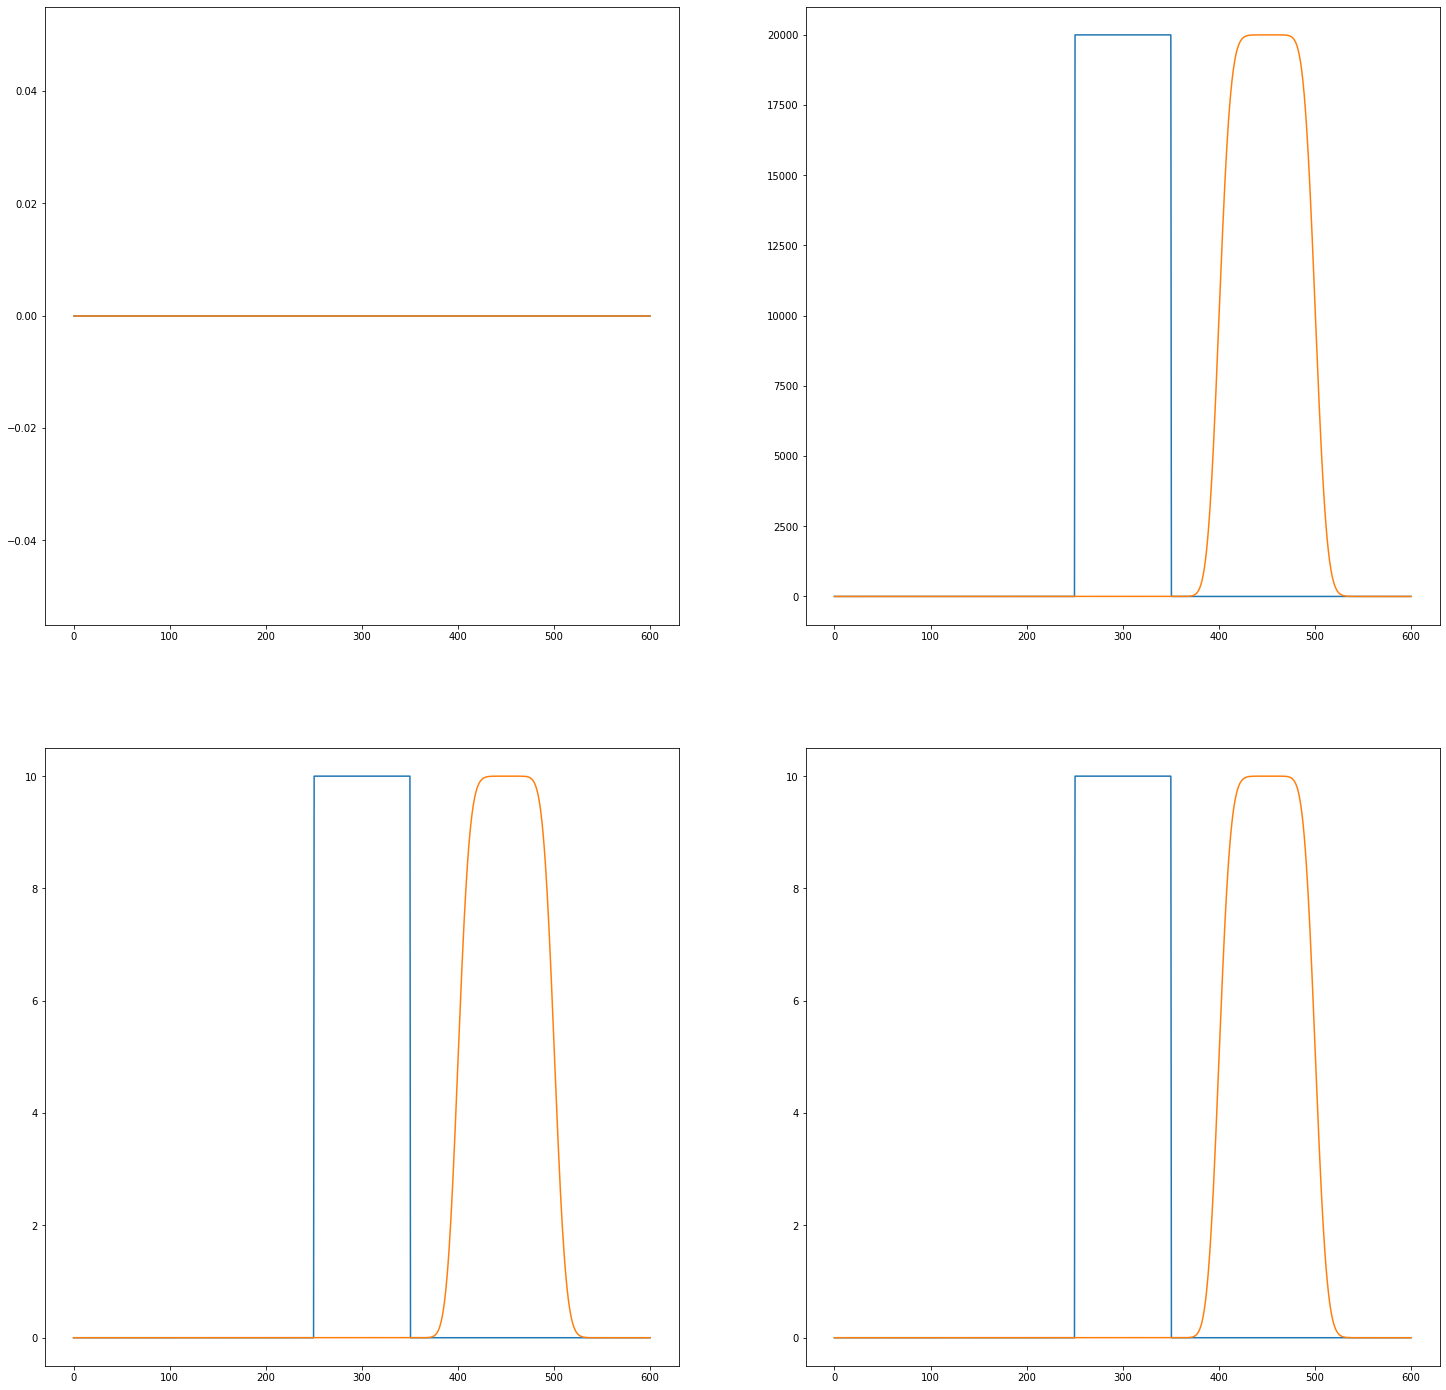

In [10]:
plt.figure(figsize=(25,25))
plt.subplot(2, 2, 1)
plt.plot(x, W['1'])
plt.plot(x, W_new['1'])
plt.subplot(2, 2, 2)
plt.plot(x, W['2'])
plt.plot(x, W_new['2'])
plt.subplot(2, 2, 3)
plt.plot(x, U['v'])
plt.plot(x, U_new['v'])
plt.subplot(2, 2, 4)
plt.plot(x, U['p'])
plt.plot(x, U_new['p'])